## Library

Load library yang akan digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score,confusion_matrix,  plot_confusion_matrix,classification_report

## Dataset
Load `Data Train.csv`dataset

In [ ]:
# Load data train
data_train = pd.read_csv('Data Train.csv')
data_train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## Exploratory Data Analysis (EDA)

Tahap menganalisis setiap variabel dari data

1. Mengamati Kumpulan Data

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [ ]:
print('Ukuran Baris :', data_train.shape[0], '\n')
print('Ukuran Kolom :', data_train.shape[1])

Ukuran Baris : 4250 

Ukuran Kolom : 20


2. Mencari dan Memperbaiki Missing Value

In [ ]:
# Cek Missing Value dan nilai unik

# total nilai null pada setiap kolom
total_null = data_train.isnull().sum()

# persentase nilai null pada setiap kolom
percent_null = total_null / len(data_train) * 100

# jumlah nilai unik pada setiap kolom
unique_values = data_train.nunique()

# persentase nilai unik pada setiap kolom
percent_unique = unique_values / len(data_train) * 100

# membuat DataFrame dengan kolom-kolom informasi yang diinginkan
info = pd.DataFrame({'null': total_null,
                     'null_%': percent_null,
                     'Unique': unique_values,
                     'Unique_%': percent_unique})

# tampilkan hasil
print(info)

                               null  null_%  Unique   Unique_%
state                             0     0.0      51   1.200000
account_length                    0     0.0     215   5.058824
area_code                         0     0.0       3   0.070588
international_plan                0     0.0       2   0.047059
voice_mail_plan                   0     0.0       2   0.047059
number_vmail_messages             0     0.0      46   1.082353
total_day_minutes                 0     0.0    1843  43.364706
total_day_calls                   0     0.0     120   2.823529
total_day_charge                  0     0.0    1843  43.364706
total_eve_minutes                 0     0.0    1773  41.717647
total_eve_calls                   0     0.0     123   2.894118
total_eve_charge                  0     0.0    1572  36.988235
total_night_minutes               0     0.0    1757  41.341176
total_night_calls                 0     0.0     128   3.011765
total_night_charge                0     0.0     992  23

In [ ]:
#cek duplikat
print("Jumlah Data Duplikat :", data_train.duplicated().sum(),'\n')
data_train.duplicated()

Jumlah Data Duplikat : 0 



0       False
1       False
2       False
3       False
4       False
        ...  
4245    False
4246    False
4247    False
4248    False
4249    False
Length: 4250, dtype: bool

Karena tidak terdapat missing value pada data maka tidak perlu memperbaiki data

3. Mengkategorisasikan data

In [ ]:
numerical = data_train.select_dtypes(include='number')
categorical = data_train.select_dtypes(include='object')
display(numerical.head(5), categorical.head(5))
print("Jumlah kolom numerik:", len(numerical.columns))
print("Jumlah kolom kategorik:", len(categorical.columns))

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3


,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


Jumlah kolom numerik: 15
Jumlah kolom kategorik: 5


In [ ]:
#nilai unik (distinct) dari kolom 'state'
unik = data_train['state'].unique()
print(unik)

['OH' 'NJ' 'OK' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY' 'ID' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'SC' 'WY' 'HI' 'NH' 'AK' 'GA' 'MD' 'AR' 'WI' 'OR'
 'MI' 'DE' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'VT' 'KY' 'ME'
 'MS' 'AL' 'NE' 'KS' 'TN' 'IL' 'PA' 'CT' 'ND']


In [ ]:
#Variabel Kategori
print(pd.value_counts(data_train.area_code),'\n')
print(pd.value_counts(data_train.international_plan),'\n')
print(pd.value_counts(data_train.voice_mail_plan),'\n')
print(pd.value_counts(data_train.churn),'\n')

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64 

no     3854
yes     396
Name: international_plan, dtype: int64 

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64 

no     3652
yes     598
Name: churn, dtype: int64 



4. Mengidentifikasi Hubungan antar variabel

<AxesSubplot:>

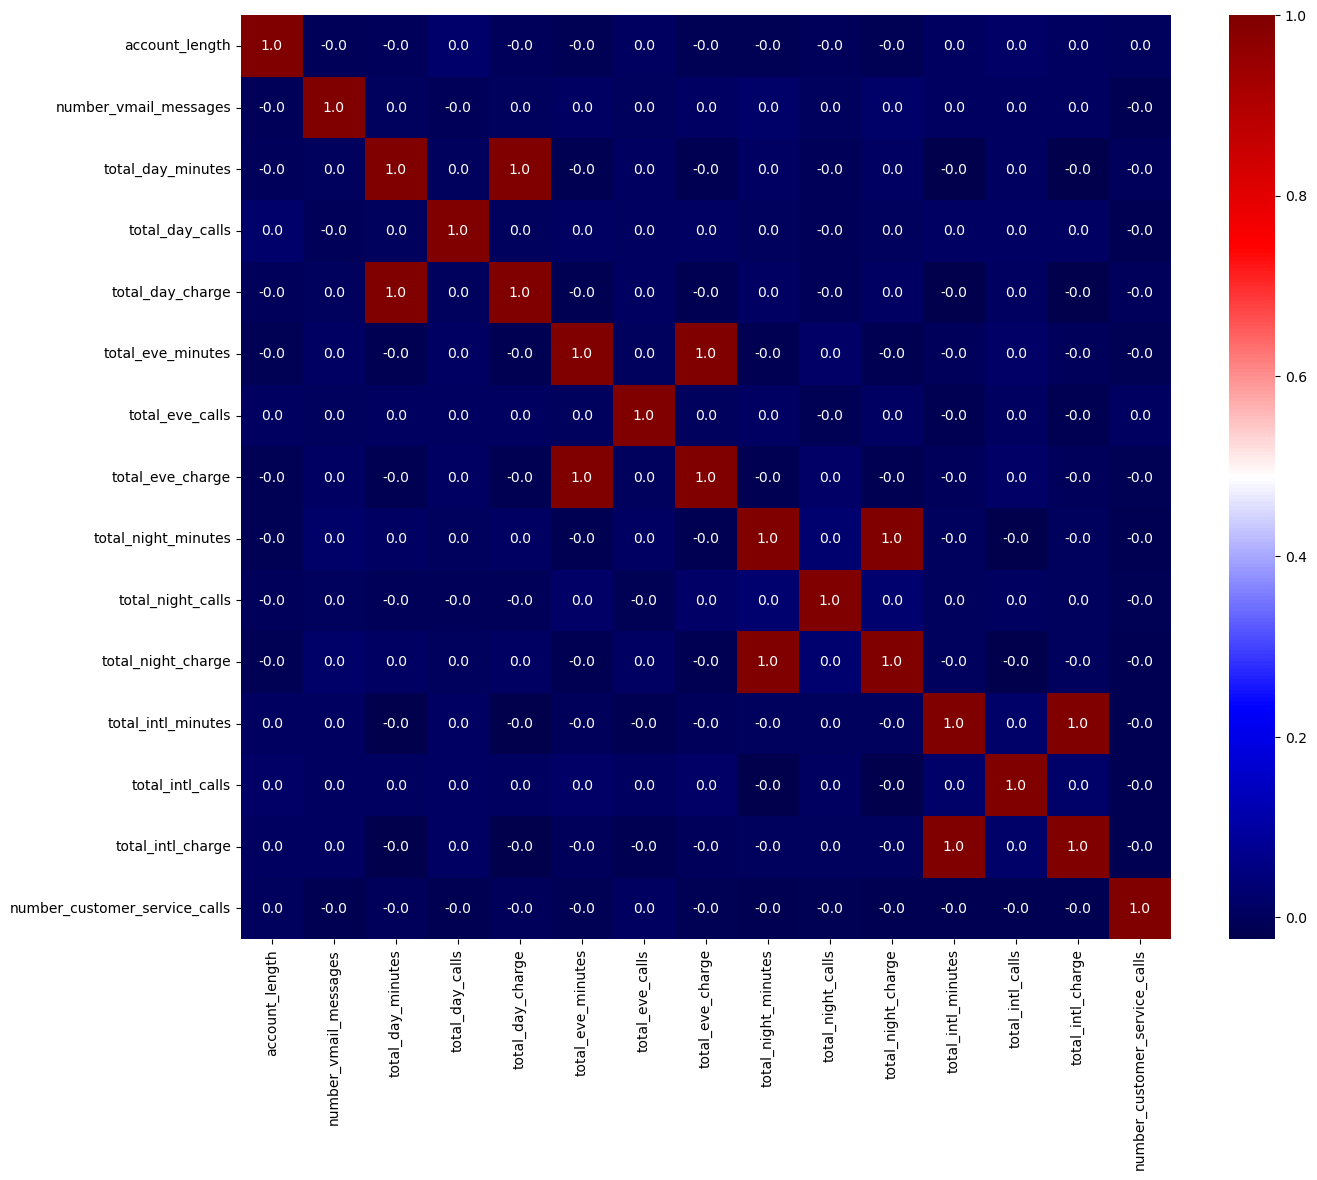

In [ ]:
#korelasi antara kolom-kolom dalam Data
plt.figure(figsize=(15,12))
sns.heatmap(data_train.corr(), cmap = "seismic", annot = True, fmt = ".1f")

Variabel yang memiliki korelasi sempurna (corr = 1):
- total_day_charge dengan total_day_minutes
- total_eve_charge dengan total_eve_minutes
- total_night_charge dengan total_night_minutes
- total_night_minutes dengan total_intl_minutes

4. Mengidentifikasi Outlier dan Skewness Data

C:\Users\rifak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rifak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rifak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

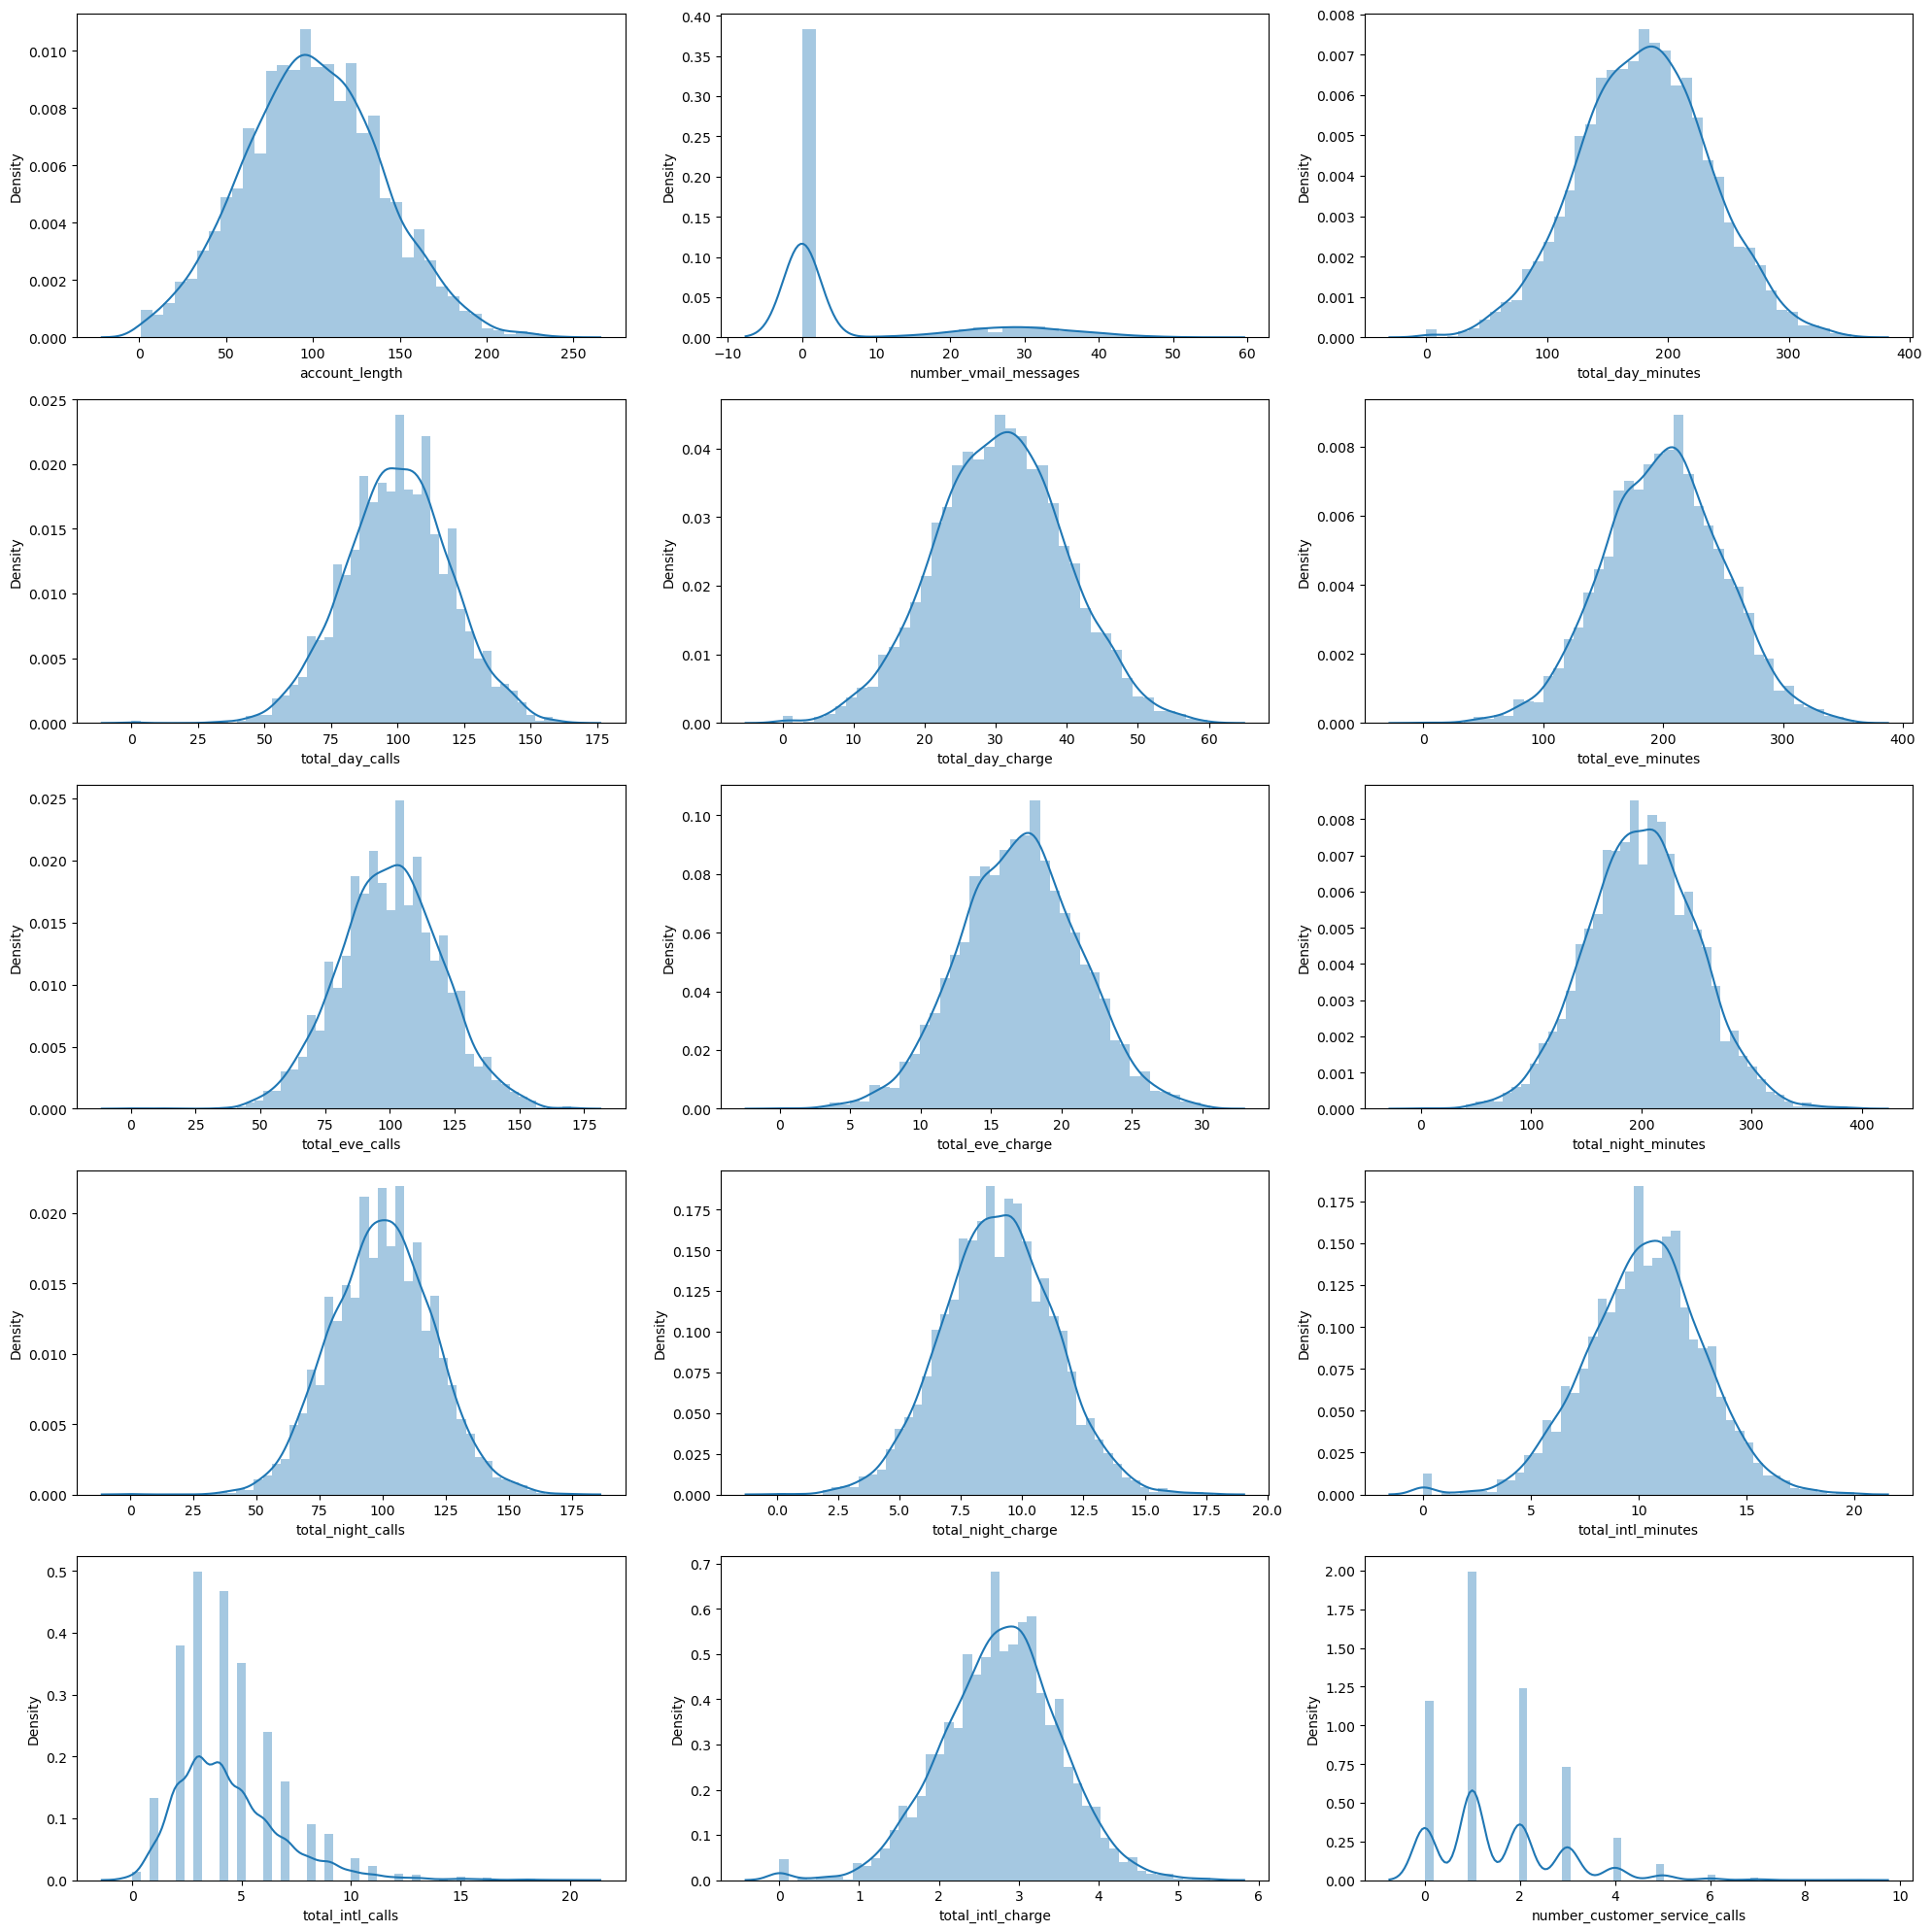

In [ ]:
# histogram dari setiap kolom pada Data
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

for i, col in enumerate(numerical.columns):
    row = i // 3
    col_idx = i % 3  # use a different name for the column index variable
    sns.distplot(data_train[col], ax=axes[row, col_idx])

plt.tight_layout()
plt.show()

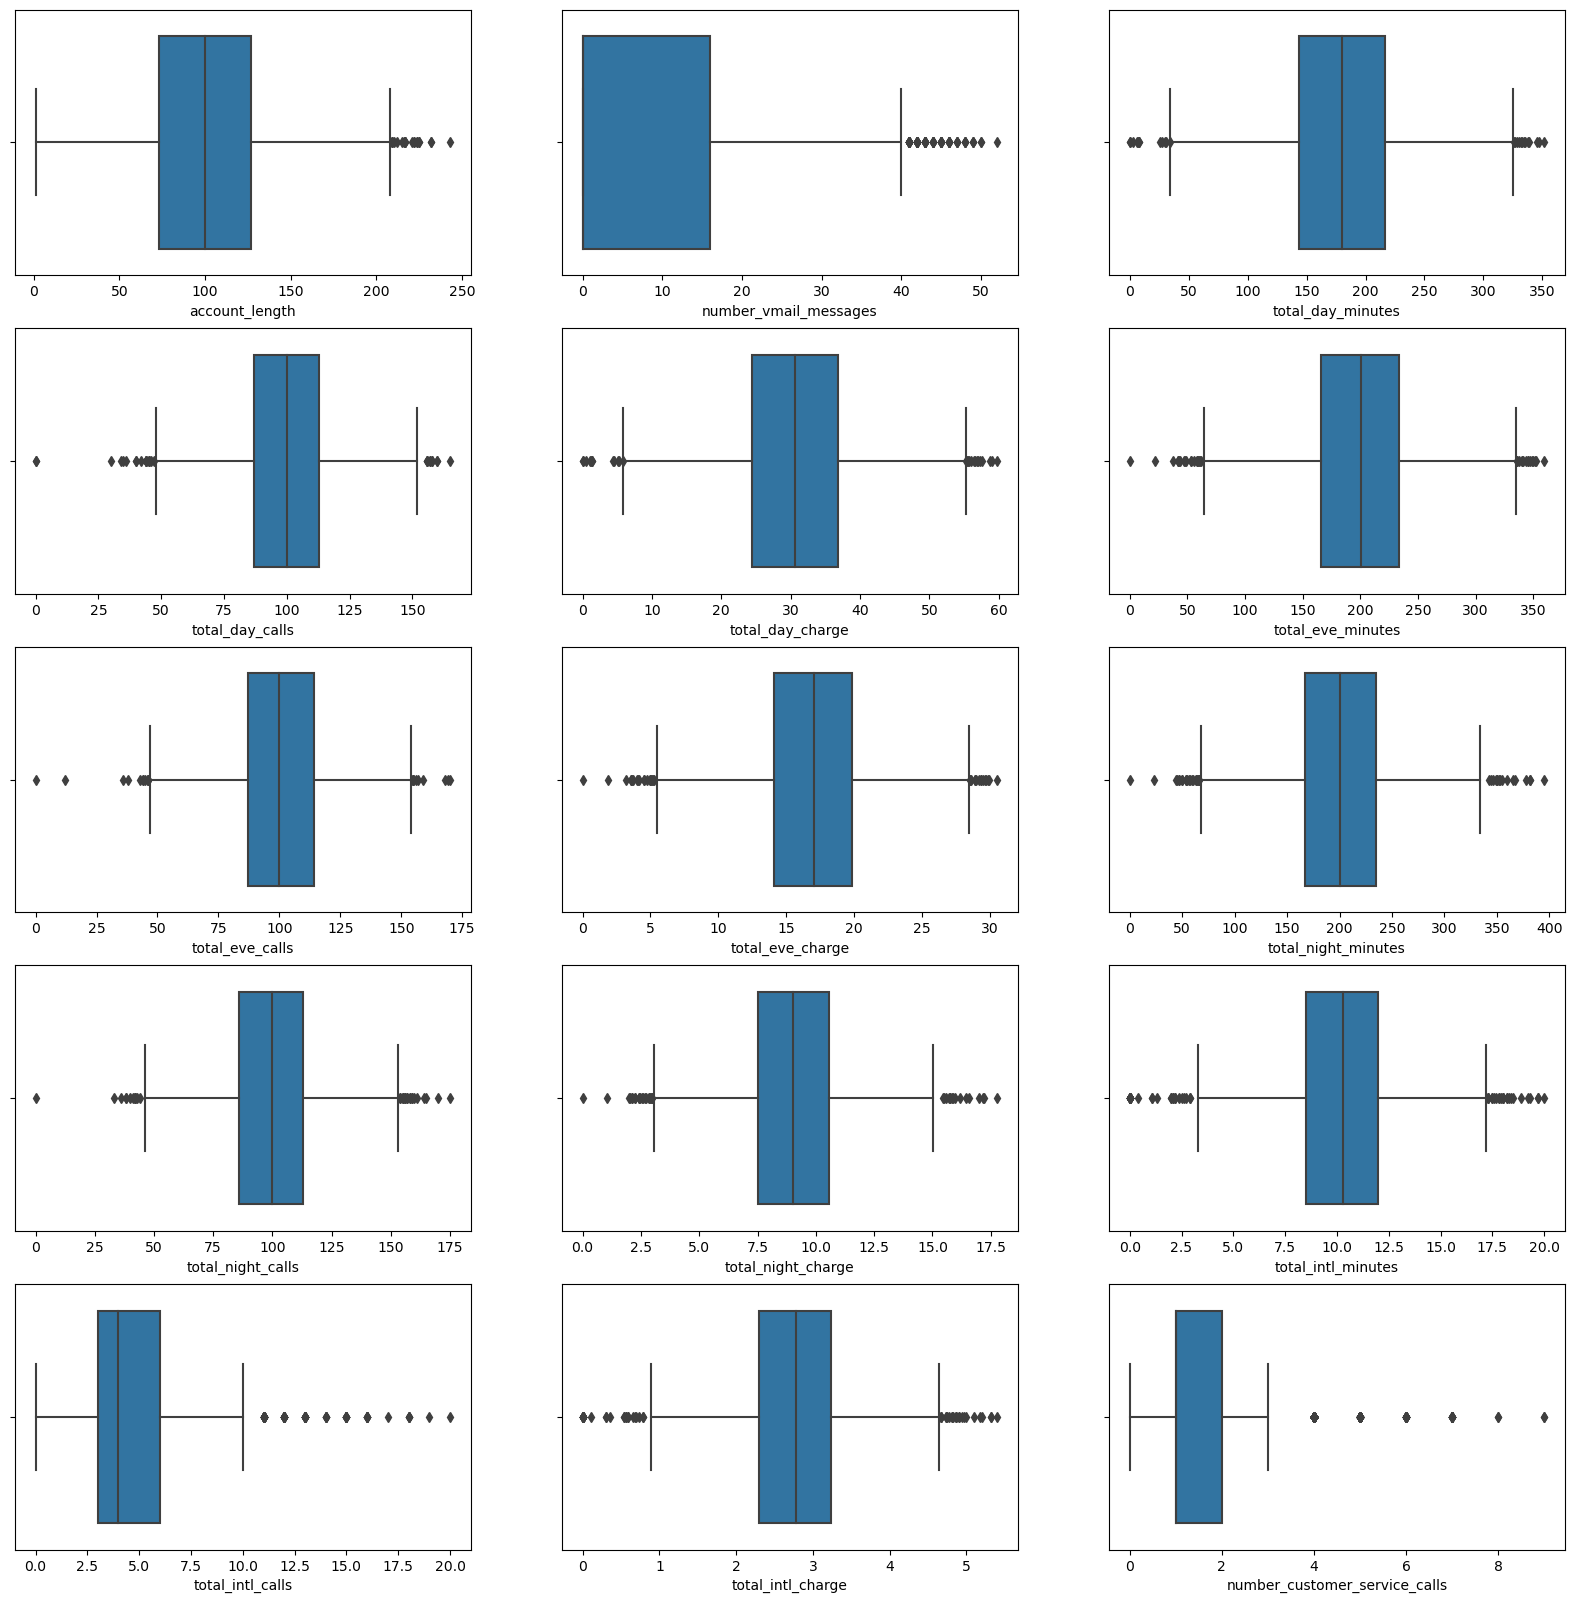

In [ ]:
# Boxplot dari setiap kolom pada Data
fig, axes = plt.subplots(5, 3, figsize=(20, 20))

for i in range(5):
    for j in range(3):
        kolom = numerical.columns[i*3+j]
        sns.boxplot(x=kolom, data=data_train, ax=axes[i][j])

plt.show()

In [ ]:
def get_len_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((column < lower_bound) | (column > upper_bound)).sum()

In [ ]:
descript = data_train.describe(include='number').T
descript['num_outlier'] = numerical.apply(get_len_outliers).values
descript

,count,mean,std,min,25%,50%,75%,max,num_outlier
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00,20
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00,86
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50,25
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00,28
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76,26
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30,34
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00,24
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54,34
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00,37
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00,33


In [ ]:
num_outlier = numerical.apply(get_len_outliers)
# Membuat dataframe yang berisi kolom dan jumlah outlier pada setiap kolom
pencilan = pd.DataFrame({' ': numerical.columns, 'num_outlier': num_outlier.values})
pencilan

,,num_outlier
0,account_length,20
1,number_vmail_messages,86
2,total_day_minutes,25
3,total_day_calls,28
4,total_day_charge,26
5,total_eve_minutes,34
6,total_eve_calls,24
7,total_eve_charge,34
8,total_night_minutes,37
9,total_night_calls,33


5. Statistika Deskriptif

C:\Users\rifak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


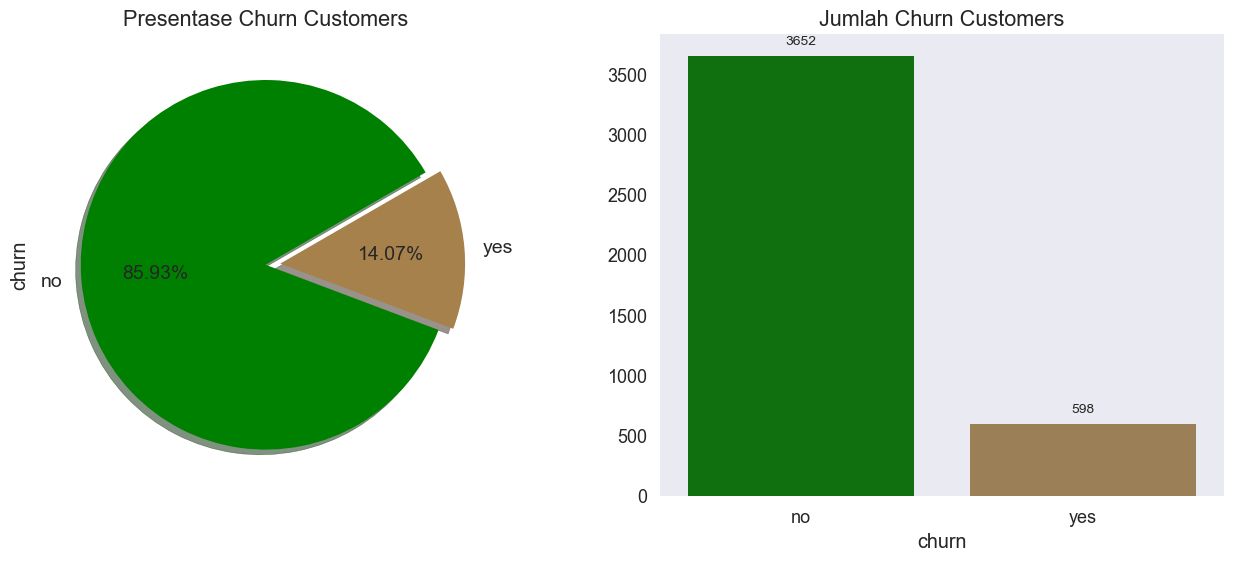

In [ ]:
#menampilkan ratio data dan total jumlah customer yang churn dan tidak

plt.style.use(['seaborn-dark','seaborn-talk'])

fig, ax = plt.subplots(1,2,figsize=(16,6))

data_train["churn"].value_counts().plot.pie(explode=[0,0.08], ax=ax[0], autopct='%1.2f%%', shadow=True,
                                    fontsize=14, startangle=30, colors=["#008000", "#a6814c"])
ax[0].set_title('Presentase Churn Customers')

sns.countplot("churn", data=data_train, ax=ax[1], palette=["#008000", "#a6814c"])
ax[1].set_title('Jumlah Churn Customers')
ax[1].set_ylabel(' ')

# Menghitung jumlah data pada setiap bar
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 10),
                   textcoords = 'offset points')

plt.show()

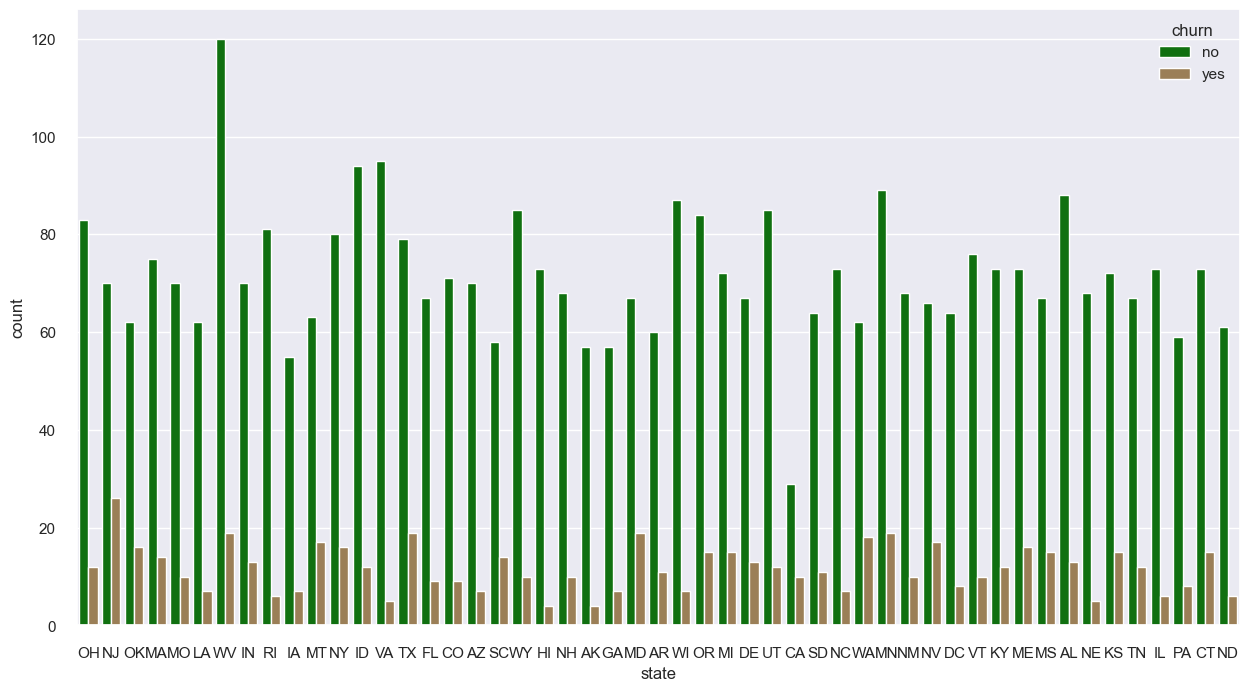

In [ ]:
#Komparasi churn dengan state menggunakan countplot
sns.set(style='darkgrid')
plt.figure(figsize=(15,8))
ax = sns.countplot(x='state', hue = 'churn', data = data_train, palette=["#008000", "#a6814c"])
plt.show()

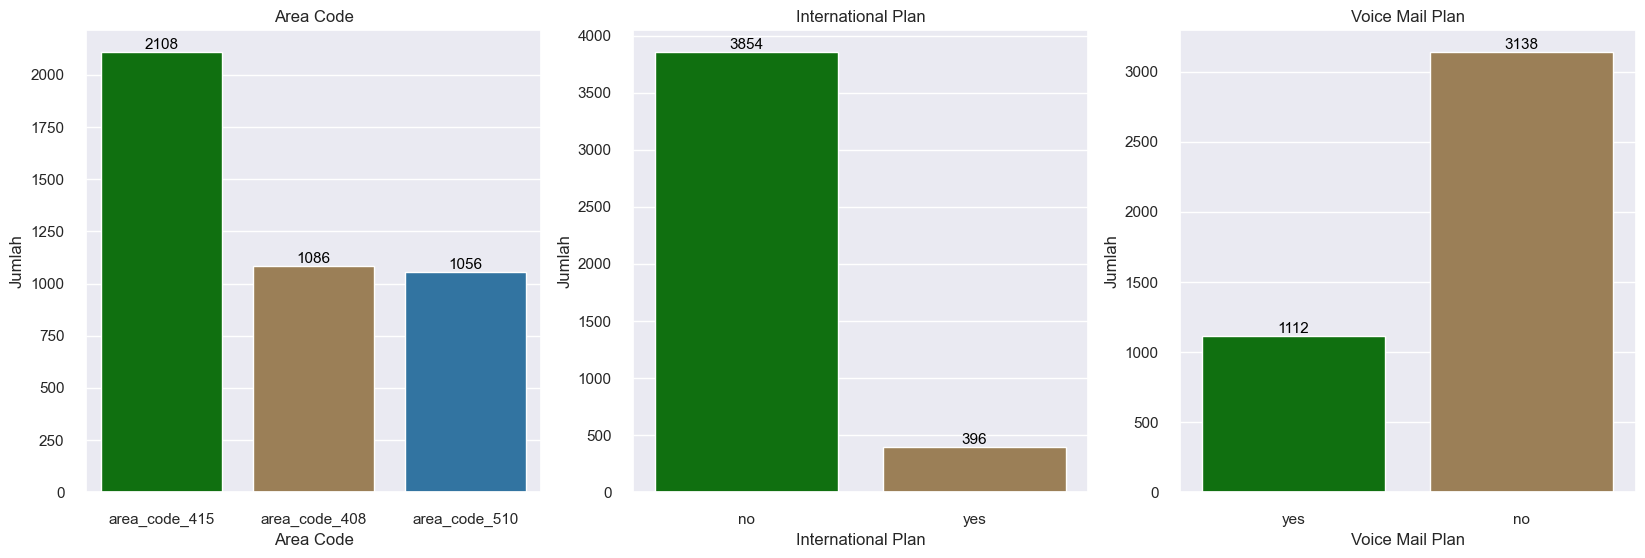

In [ ]:
#countplots untuk variabel kategori
sns.set(style='darkgrid')

# Variabel Kategori
area_code_counts = pd.value_counts(data_train.area_code)
intl_plan_counts = pd.value_counts(data_train.international_plan)
vm_plan_counts = pd.value_counts(data_train.voice_mail_plan)

# Plotting
plt.figure(figsize=(20, 6))

#area code
ax1 = plt.subplot(1, 3, 1)
ax1 = sns.countplot(x='area_code', data=data_train, palette=["#008000", "#a6814c", "#1f77b4"])
ax1.set_title('Area Code')
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
ax1.set_xlabel('Area Code')
ax1.set_ylabel('Jumlah')

#international plan
ax2 = plt.subplot(1, 3, 2)
ax2 = sns.countplot(x='international_plan', data=data_train, palette=["#008000", "#a6814c"])
ax2.set_title('International Plan')
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
ax2.set_xlabel('International Plan')
ax2.set_ylabel('Jumlah')

#voice mail plan
ax3 = plt.subplot(1, 3, 3)
ax3 = sns.countplot(x='voice_mail_plan', data=data_train, palette=["#008000", "#a6814c"])
ax3.set_title('Voice Mail Plan')
for p in ax3.patches:
    ax3.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')
ax3.set_xlabel('Voice Mail Plan')
ax3.set_ylabel('Jumlah')

plt.show()

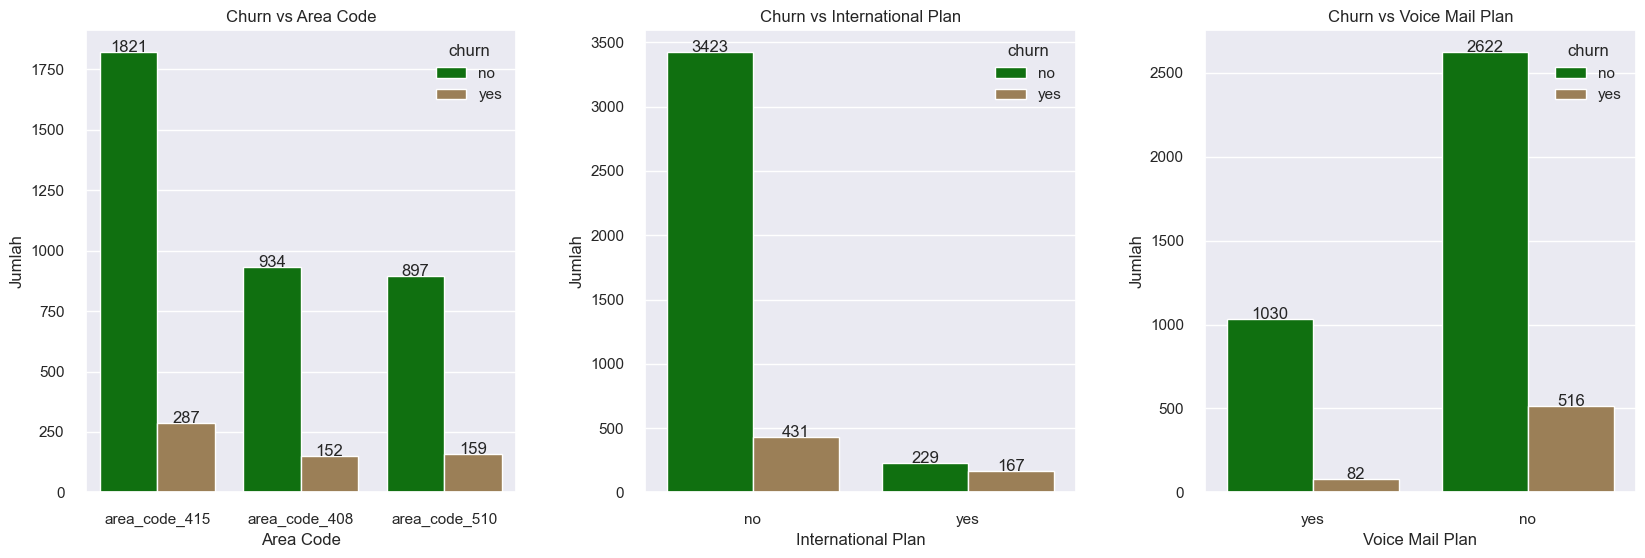

In [ ]:
#countplot dari variabel churn terhadap variabel kategori 'area_code', 'international_plan', dan 'voice_mail_plan'
_, axs = plt.subplots(1, 3, figsize=(20, 6))
plt.subplots_adjust(wspace = 0.3)

#Churn vs Area Code
ax = sns.countplot(data = data_train, x = "area_code", hue = "churn", ax = axs[0], palette=["#008000", "#a6814c"])
ax.set_title('Churn vs Area Code')
ax.set_xlabel('Area Code')
ax.set_ylabel('Jumlah')

# Churn vs International Plan
ax1 = sns.countplot(data = data_train, x = "international_plan", hue = "churn", ax = axs[1], palette=["#008000", "#a6814c"])
ax1.set_title('Churn vs International Plan')
ax1.set_xlabel('International Plan')
ax1.set_ylabel('Jumlah')

#Churn vs Voice Mail Plan
ax2 = sns.countplot(data = data_train, x = "voice_mail_plan", hue = "churn", ax = axs[2], palette=["#008000", "#a6814c"])
ax2.set_title('Churn vs Voice Mail Plan')
ax2.set_xlabel('Voice Mail Plan')
ax2.set_ylabel('Jumlah')

for ax in axs.flat:
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x()+p.get_width()/2,
            height,
            "{:.0f}".format(height),
            ha = "center", rotation = 0
        )

plt.show()


## Pre-Prossesing

In [ ]:
#Menghapus kolom
data_train.drop(columns=['state','total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes'],axis=1,inplace=True)
data_train.head(5)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,107,area_code_415,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,no
1,137,area_code_415,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,no
2,84,area_code_408,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,no
3,75,area_code_415,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,no
4,121,area_code_510,no,yes,24,88,37.09,108,29.62,118,9.57,7,2.03,3,no


<AxesSubplot:>

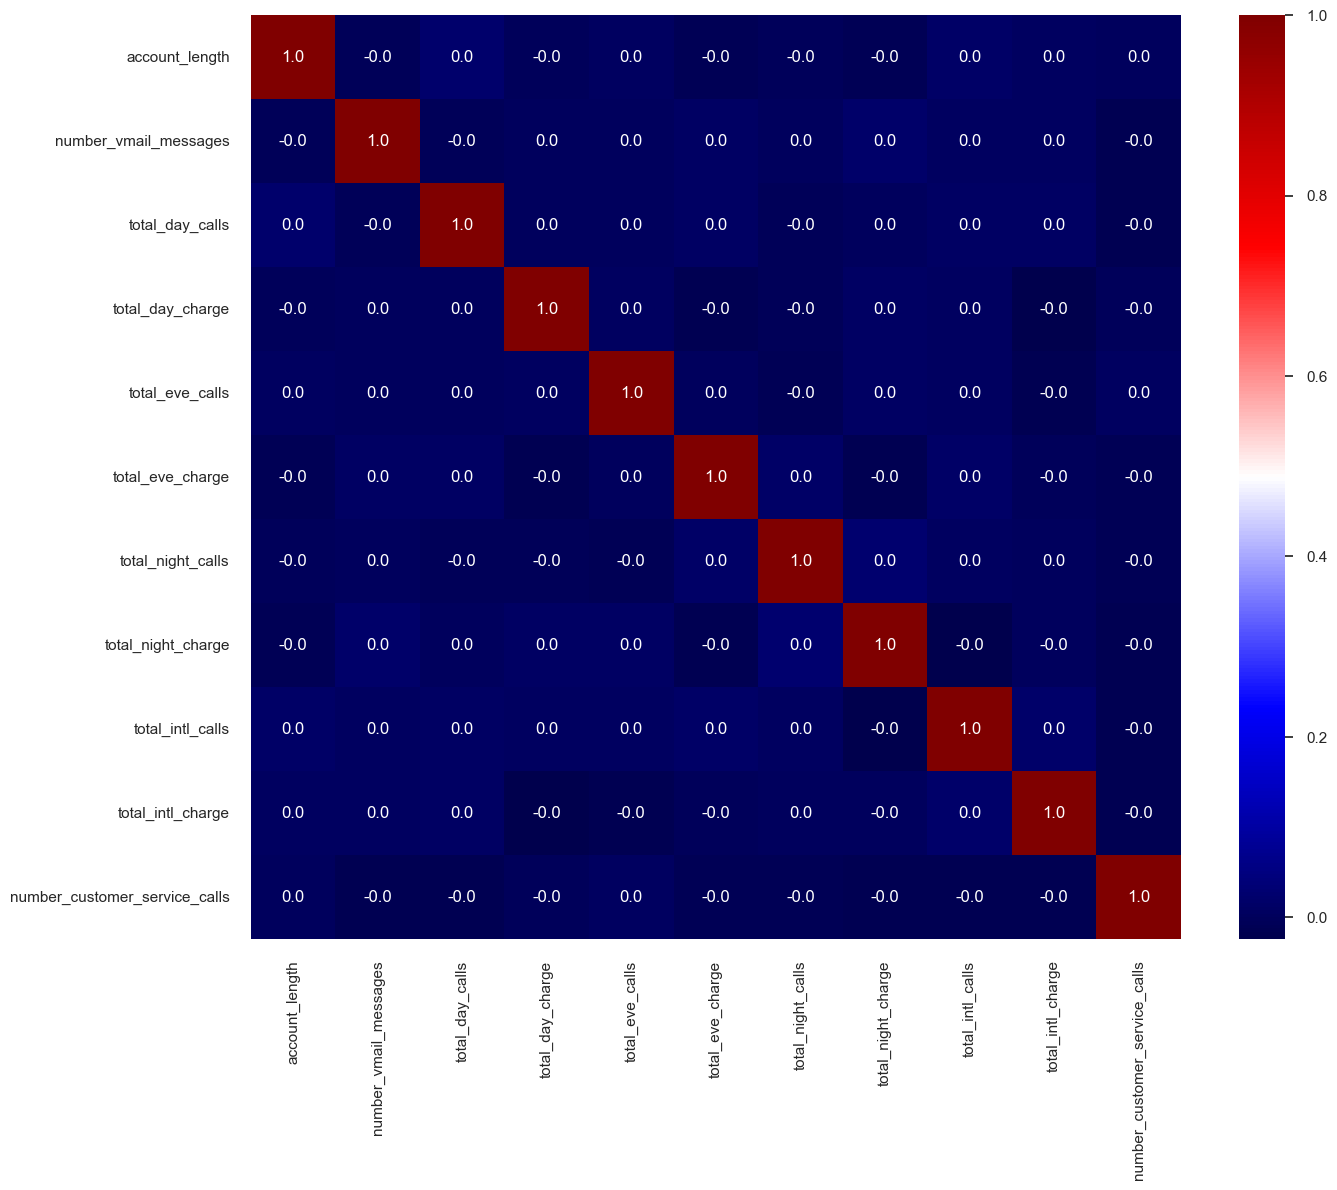

In [ ]:
#Korelasi antara variabel numerik
plt.figure(figsize=(15,12))
sns.heatmap(data_train.corr(), cmap = "seismic", annot = True, fmt = ".1f")

## Machine Learning


### Split Data

In [ ]:
#Mendefinisikan varabel x dan y
X = data_train.drop(columns = 'churn')
y = data_train['churn']

### Encoding

In [ ]:
# Encoding
y= y.replace({'no': 0, 'yes': 1})

In [ ]:
#kolom yang digunakan untuk menghasilkan variabel dummy
cols_to_transform = ['area_code', 'international_plan', 'voice_mail_plan']
# mengubah variabel kategori menjadi variabel dummy
X = pd.get_dummies(X, columns= cols_to_transform )
X.head(5)

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,107,26,123,27.47,103,16.62,103,11.45,3,3.70,1,0,1,0,1,0,0,1
1,137,0,114,41.38,110,10.30,104,7.32,5,3.29,0,0,1,0,1,0,1,0
2,84,0,71,50.90,88,5.26,89,8.86,7,1.78,2,1,0,0,0,1,1,0
3,75,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0,1,0,0,1,1,0
4,121,24,88,37.09,108,29.62,118,9.57,7,2.03,3,0,0,1,1,0,0,1


### Normalisasi Data

In [ ]:
#Normalisasi Data Train
scaler = MinMaxScaler()
trainScaler = scaler.fit_transform(X)
X_transform = pd.DataFrame(trainScaler, columns = X.columns)
X_transform.head(5)

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.438017,0.500000,0.745455,0.459672,0.605882,0.544204,0.588571,0.644344,0.15,0.685185,0.111111,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.561983,0.000000,0.690909,0.692436,0.647059,0.337263,0.594286,0.411930,0.25,0.609259,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.342975,0.000000,0.430303,0.851740,0.517647,0.172233,0.508571,0.498593,0.35,0.329630,0.222222,1.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.305785,0.000000,0.684848,0.474230,0.717647,0.412901,0.691429,0.473270,0.15,0.505556,0.333333,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.495868,0.461538,0.533333,0.620649,0.635294,0.969876,0.674286,0.538548,0.35,0.375926,0.333333,0.0,0.0,1.0,1.0,0.0,0.0,1.0


### Klasifikasi

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, train_size=0.8, random_state=42)

X_train.shape , y_train.shape , X_test.shape , y_test.shape

((3400, 18), (3400,), (850, 18), (850,))

In [ ]:
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return "Accuracy: {:.2%}".format(accuracy)

k-Nearest Neighbors (k-NN)

In [ ]:
# Mendefinisikan KKN
knn = KNeighborsClassifier()

# Train KNN dan buat prediksi
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

print(evaluasi_model(knn, X_test, y_test))
print("KNN")
print(classification_report(y_test,knn_pred))

C:\Users\rifak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\rifak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy: 87.88%
KNN
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       721
           1       0.77      0.29      0.42       129

    accuracy                           0.88       850
   macro avg       0.83      0.64      0.68       850
weighted avg       0.87      0.88      0.85       850



Logistic Regression

In [ ]:
# Mendefinisikan Logistic Regression
lr = LogisticRegression()

# Train Logistic Regression dan buat prediksi
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print(evaluasi_model(lr, X_test, y_test))
print("Logistic Regression ")
print(classification_report(y_test,lr_pred))

Accuracy: 86.00%
Logistic Regression 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       721
           1       0.62      0.19      0.30       129

    accuracy                           0.86       850
   macro avg       0.75      0.59      0.61       850
weighted avg       0.83      0.86      0.83       850



Random Forest

In [ ]:
# Mendefinisikan Random Forest
rf = RandomForestClassifier()

# Train Random Forest dan buat prediksi
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print(evaluasi_model(rf, X_test, y_test))
print ("Random Forest")
print(classification_report(y_test,rf_pred))

Accuracy: 95.29%
Random Forest
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       721
           1       0.92      0.75      0.83       129

    accuracy                           0.95       850
   macro avg       0.94      0.87      0.90       850
weighted avg       0.95      0.95      0.95       850



Desicion Tree

In [ ]:
# Mendefinisikan Decision Tree
dt = DecisionTreeClassifier()

# Train Decision Tree dan buat prediksi
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print(evaluasi_model(dt, X_test, y_test))
print("Decision Tree")
print(classification_report(y_test,dt_pred))

Accuracy: 90.82%
Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       721
           1       0.69      0.72      0.70       129

    accuracy                           0.91       850
   macro avg       0.82      0.83      0.83       850
weighted avg       0.91      0.91      0.91       850



### Evaluasi Model

In [ ]:
#performa beberapa model machine learning yang telah dilatih pada suatu dataset
# Menginisialisasi empat model klasifikasi
models = [knn, lr, rf, dt]

# Membuat list untuk menyimpan hasil evaluasi masing-masing model
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
roc_auc_list = []

# Looping untuk mengevaluasi setiap model dan menyimpan hasilnya ke dalam list
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append('{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
    precision_list.append('{:.2f}%'.format(precision_score(y_test, y_pred)*100))
    recall_list.append('{:.2f}%'.format(recall_score(y_test, y_pred)*100))
    f1_score_list.append('{:.2f}%'.format(f1_score(y_test, y_pred)*100))
    roc_auc_list.append('{:.2f}%'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])*100))

# Membuat dataframe dari hasil evaluasi
df = pd.DataFrame({
    'Model': ['KNN','Logistic Regression','Random Forest', 'Decision Tree'],
    'Accuracy': accuracy_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'F1-Score': f1_score_list,
    'ROC AUC': roc_auc_list
})
df

C:\Users\rifak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,KNN,87.88%,77.08%,28.68%,41.81%,79.89%
1,Logistic Regression,86.00%,62.50%,19.38%,29.59%,82.29%
2,Random Forest,95.41%,94.12%,74.42%,83.12%,91.38%
3,Decision Tree,90.00%,65.49%,72.09%,68.63%,82.65%


Model Random Forest memiliki nilai accuracy, precision, recall, F1-score ROC AUC tertinggi. Hal ini menunjukkan bahwa model tersebut memiliki performa terbaik dalam memprediksi kasus pada dataset

In [ ]:
# Hitung confusion matrices untuk setiap model klasifikasi
knn_cm = confusion_matrix(y_test, knn_pred)
lr_cm = confusion_matrix(y_test, lr_pred)
rf_cm = confusion_matrix(y_test, rf_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

print('knn:', knn_cm,'\n', 'Logistic Regression', lr_cm, '\n',
      'Random Forest', rf_cm, '\n', 'Random Forest',dt_cm,'\n')

knn: [[710  11]
 [ 92  37]] 
 Logistic Regression [[706  15]
 [104  25]] 
 Random Forest [[713   8]
 [ 32  97]] 
 Random Forest [[679  42]
 [ 36  93]] 



C:\Users\rifak\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[Text(0, 0.5, 'No churn'), Text(0, 1.5, 'Churn')]

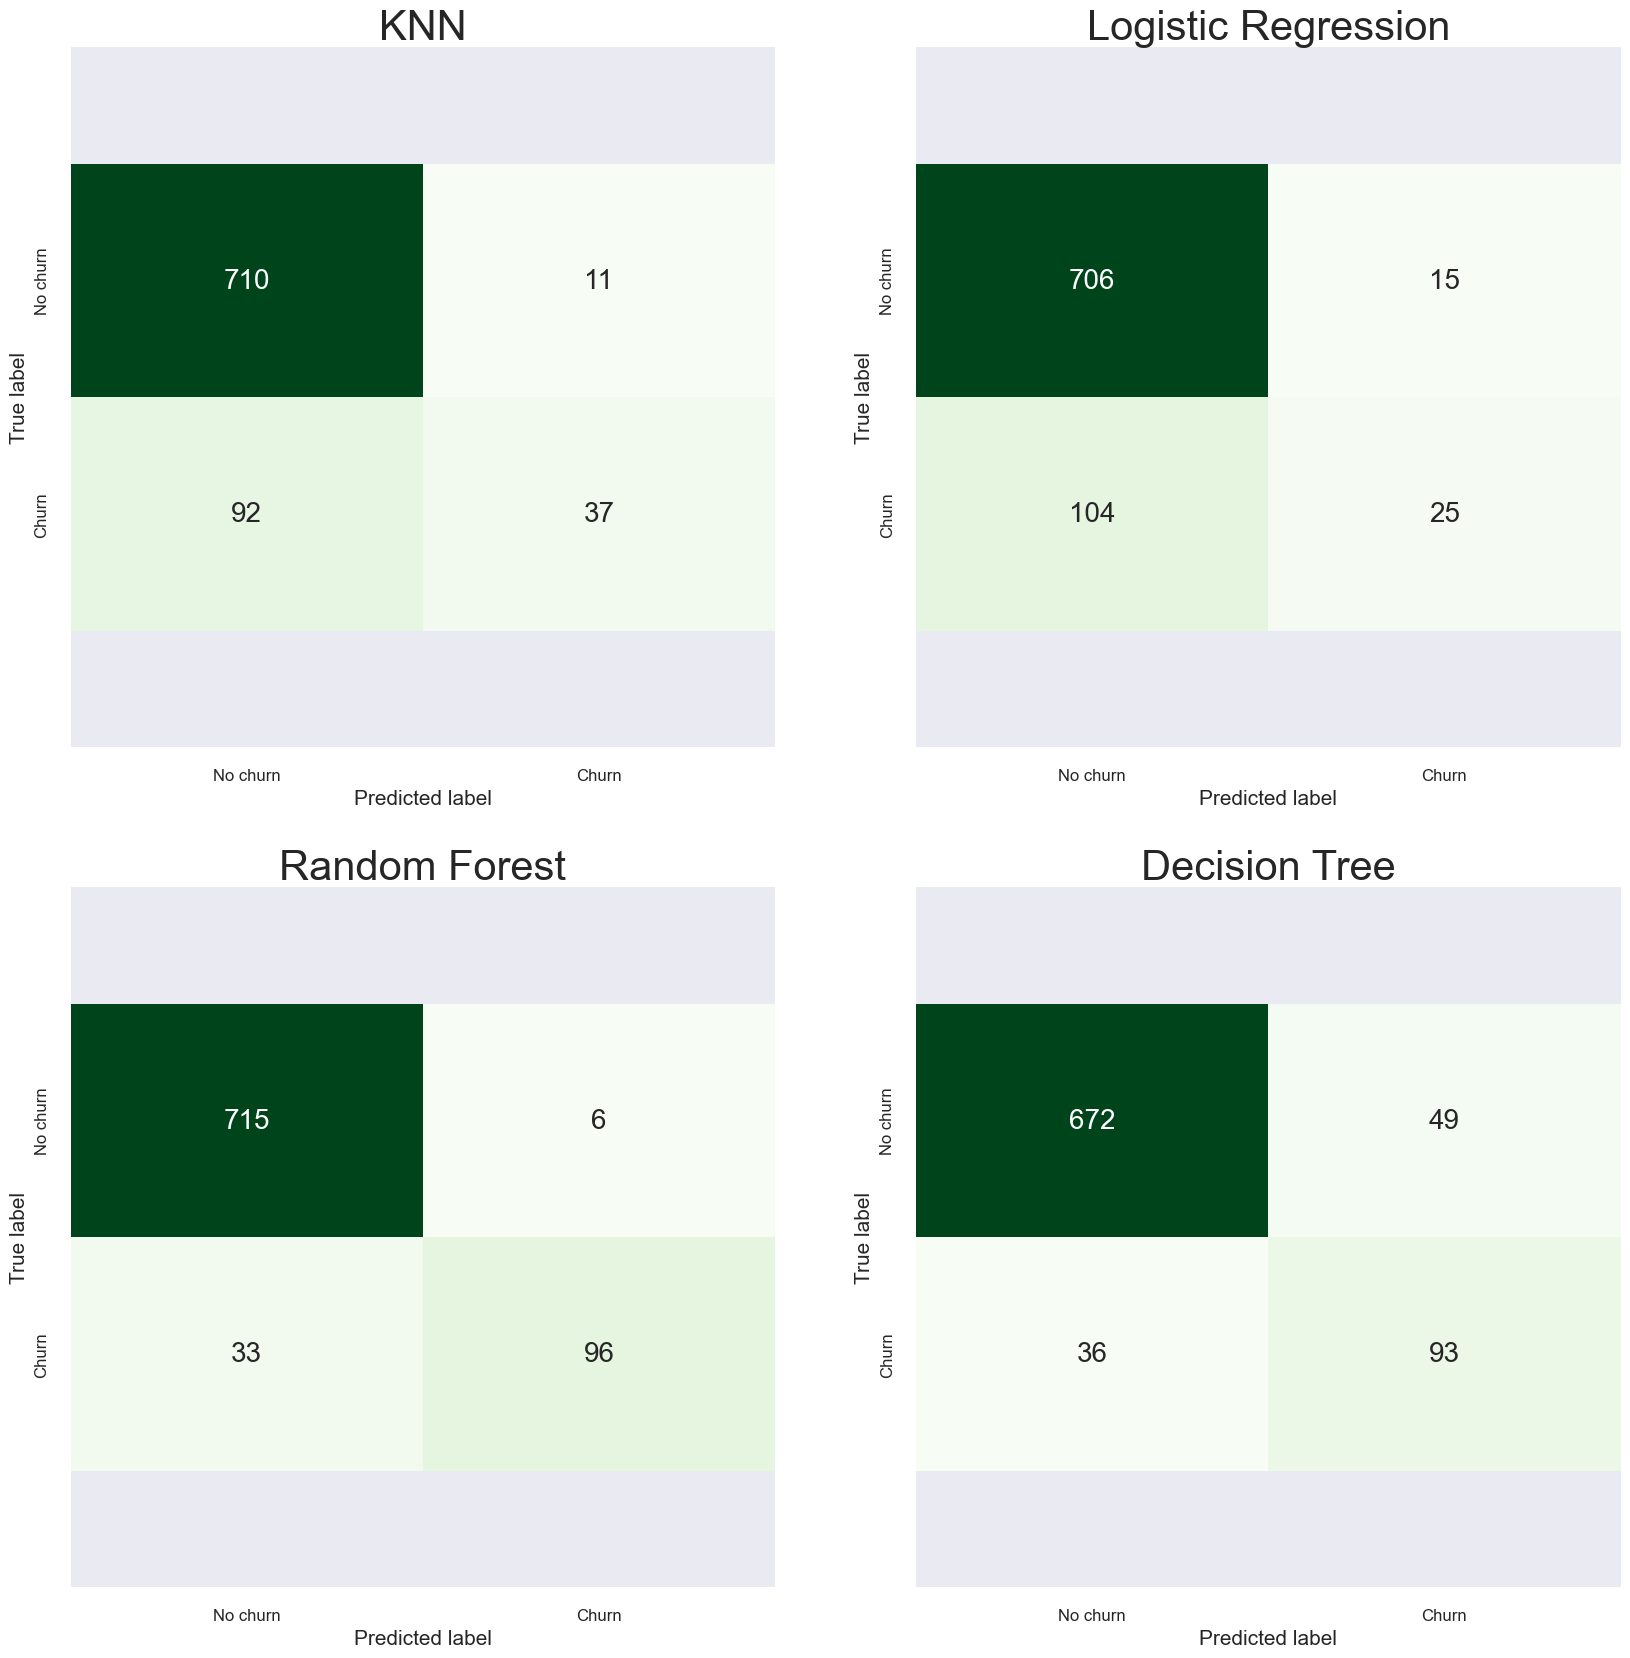

In [ ]:
# Buat gambar dengan kisi subplot 2x2
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

def plot_confusion_matrix(model, X, y_true, ax=None):
    y_pred = model.predict(X)
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax, annot_kws={"size": 20})
    ax.set_ylim(len(cm)+0.5, -0.5)

# Plot confusion matrix untuk KNN classifier
plot_confusion_matrix(knn, X_test, y_test, ax=axs[0][0])
axs[0][0].set_title("KNN", fontsize=30)
axs[0][0].set_xlabel("Predicted label", fontsize=15)
axs[0][0].set_ylabel("True label", fontsize=15)
axs[0][0].set_xticklabels(['No churn', 'Churn'], fontsize=12)
axs[0][0].set_yticklabels(['No churn', 'Churn'], fontsize=12)

# Plot confusion matrix untuk Logistic Regression classifier
plot_confusion_matrix(lr, X_test, y_test, ax=axs[0][1])
axs[0][1].set_title("Logistic Regression", fontsize=30)
axs[0][1].set_xlabel("Predicted label", fontsize=15)
axs[0][1].set_ylabel("True label", fontsize=15)
axs[0][1].set_xticklabels(['No churn', 'Churn'], fontsize=12)
axs[0][1].set_yticklabels(['No churn', 'Churn'], fontsize=12)


# Plot confusion matrix untuk Random Forest classifier
plot_confusion_matrix(rf, X_test, y_test, ax=axs[1][0])
axs[1][0].set_title("Random Forest", fontsize=30)
axs[1][0].set_xlabel("Predicted label", fontsize=15)
axs[1][0].set_ylabel("True label", fontsize=15)
axs[1][0].set_xticklabels(['No churn', 'Churn'], fontsize=12)
axs[1][0].set_yticklabels(['No churn', 'Churn'], fontsize=12)

# Plot confusion matrix for Decision Tree classifier
plot_confusion_matrix(dt, X_test, y_test, ax=axs[1][1])
axs[1][1].set_title("Decision Tree", fontsize=30)
axs[1][1].set_xlabel("Predicted label", fontsize=15)
axs[1][1].set_ylabel("True label", fontsize=15)
axs[1][1].set_xticklabels(['No churn', 'Churn'], fontsize=12)
axs[1][1].set_yticklabels(['No churn', 'Churn'], fontsize=12)

## Prediksi

### Load Data Test

Load `Data Test.csv`dataset

In [ ]:
# Load data train
data_test = pd.read_csv('Data Test.csv')
data_test.head(5)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

### Pre - Processing Data Test

In [ ]:
#Menghapus kolom
data_test.drop(columns=['id','state',
                        'total_day_minutes', 'total_eve_minutes',
                        'total_night_minutes', 'total_intl_minutes'],
               axis=1,inplace=True)
data_test.head(5)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls
0,128,area_code_415,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,118,area_code_510,yes,no,0,98,37.98,101,18.75,118,9.18,6,1.70,0
2,62,area_code_415,no,no,0,70,20.52,76,26.11,99,9.14,6,3.54,4
3,93,area_code_510,no,no,0,114,32.42,111,18.55,121,5.83,3,2.19,3
4,174,area_code_415,no,no,0,76,21.13,112,23.55,115,11.28,5,4.19,3


In [ ]:
# Encoding
#kolom yang digunakan untuk menghasilkan variabel dummy
cols_to_transform = ['area_code', 'international_plan', 'voice_mail_plan']

# mengubah variabel kategori menjadi variabel dummy
data_test = pd.get_dummies(data_test, columns= cols_to_transform )
data_test.head(5)

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,1,0,1,0,1,0,0,1
1,118,0,98,37.98,101,18.75,118,9.18,6,1.70,0,0,0,1,0,1,1,0
2,62,0,70,20.52,76,26.11,99,9.14,6,3.54,4,0,1,0,1,0,1,0
3,93,0,114,32.42,111,18.55,121,5.83,3,2.19,3,0,0,1,1,0,1,0
4,174,0,76,21.13,112,23.55,115,11.28,5,4.19,3,0,1,0,1,0,1,0


In [ ]:
#Normalisasi Data
scaler = MinMaxScaler()
testScaler = scaler.fit_transform(data_test)
data_test = pd.DataFrame(testScaler, columns = data_test.columns)
data_test.head(5)

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,0.535865,0.490196,0.572581,0.746653,0.488189,0.500000,0.506410,0.618440,0.157895,0.529412,0.166667,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.493671,0.000000,0.475806,0.623370,0.503937,0.569710,0.679487,0.488652,0.315789,0.333333,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.257384,0.000000,0.250000,0.319770,0.307087,0.830149,0.557692,0.485816,0.315789,0.694118,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.388186,0.000000,0.604839,0.526691,0.582677,0.562633,0.698718,0.251064,0.157895,0.429412,0.500000,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.729958,0.000000,0.298387,0.330377,0.590551,0.739561,0.660256,0.637589,0.263158,0.821569,0.500000,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Hasil Prediksi Menggunakan Random Forest

In [ ]:
# Buat prediksi pada data uji menggunakan random forest
predictions = rf.predict(data_test)
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
# Buat Data Frame untuk menyimpan prediksi
results = pd.DataFrame(predictions, columns=["churn_prediction"])
results.head(5)

,churn_prediction
0,0
1,0
2,1
3,0
4,1


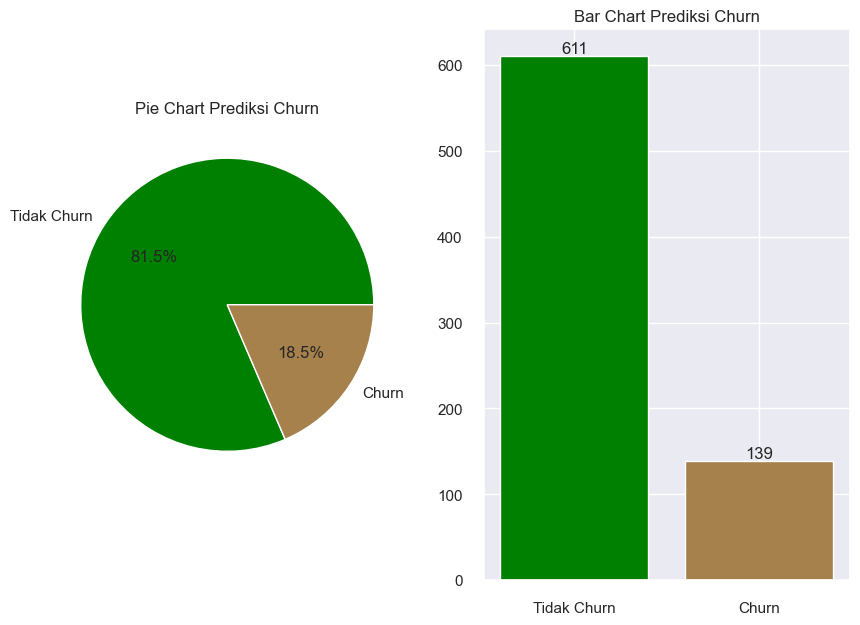

In [ ]:
# Menghitung jumlah kemunculan nilai pada kolom 'churn_prediction'
value_counts = results['churn_prediction'].value_counts()

# Membuat pie chart
plt.subplot(1, 2, 1)
plt.pie(value_counts, labels=['Tidak Churn', 'Churn'], autopct='%1.1f%%', colors=["#008000", "#a6814c"])
plt.title('Pie Chart Prediksi Churn')

# Membuat bar chart
plt.subplot(1, 2, 2)
plt.bar(['Tidak Churn', 'Churn'], value_counts, color=["#008000", "#a6814c"])
plt.title('Bar Chart Prediksi Churn')
for i, val in enumerate(value_counts.values):
    plt.text(i, val, str(val), horizontalalignment='center', verticalalignment='bottom')

# Menampilkan kedua chart
plt.show()

In [ ]:
# Gabungkan prediksi dengan data test
results = pd.concat([data_test, results], axis=1)
results.head(5)

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_area_code_408,area_code_area_code_415,area_code_area_code_510,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,churn_prediction
0,0.535865,0.490196,0.572581,0.746653,0.488189,0.500000,0.506410,0.618440,0.157895,0.529412,0.166667,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0
1,0.493671,0.000000,0.475806,0.623370,0.503937,0.569710,0.679487,0.488652,0.315789,0.333333,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0
2,0.257384,0.000000,0.250000,0.319770,0.307087,0.830149,0.557692,0.485816,0.315789,0.694118,0.666667,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1
3,0.388186,0.000000,0.604839,0.526691,0.582677,0.562633,0.698718,0.251064,0.157895,0.429412,0.500000,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0
4,0.729958,0.000000,0.298387,0.330377,0.590551,0.739561,0.660256,0.637589,0.263158,0.821569,0.500000,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1


In [ ]:
# Save the results to a CSV file
results.to_csv("churn_predictions.csv", index=False)